In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
import numpy as np
import math

### Cargando datos y pre-procesamiento

In [2]:
path = r'../pettyTheft/outputs/preds_pt_base_normal.csv'

df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'0': 'label_value'}, inplace=True)
df['age'] = df['age_normal'].astype(int)
df.drop(columns=['age_normal'], inplace=True)
df

,region,barrister,effective_hearings,crime_stage,score,label_value,age
0,La Araucanía,Eugenio Arturo Saez Infante,1,Consumado,0,0,19
1,Maule,Claudia Angélica Landeros Garrido,1,Consumado,0,0,23
2,Coquimbo,Francisco Salazar Castillo,3,Consumado,0,0,25
3,Libertador Bernardo O'Higgins,Jose Ignacio Barahona Cabezas,10,Consumado,0,1,35
4,Metropolitana,Eduardo Libretti Peña,1,Frustrado,0,0,30
...,...,...,...,...,...,...,...
11982,Metropolitana,Karina Bettini Silva,1,Frustrado,0,0,42
11983,Magallanes y Antártica Chilena,Leonardo Humberto Vallejos Ramirez,1,Frustrado,0,0,45
11984,Metropolitana,Ivo Arteaga Cartagena,0,Consumado,1,1,25
11985,Metropolitana,Macarena Albornoz Garrido,1,Frustrado,0,0,18


In [3]:
## Cambio edad a intervalos

values = np.round(np.linspace(df['age'].min(),df['age'].max()+1,5))

interval = []

for i in df['age'].values:
  if math.isnan(i):
    interval.append('Not found')
  else:
    for j in range(len(values)):
      if values[j] != max(values):
        if i>= values[j] and i< values[j+1]:
          interval.append(str(values[j]) + ' - ' + str(values[j+1]))
      else:
        if i>= values[j]:
          interval.append('More than ' + str(values[j]))
df['age']=interval

In [4]:
## Creación de variable "zone"

df['zone'] = np.nan

norte = ['Tarapacá', 'Arica y Parinacota', 'Antofagasta', 'Atacama', "Coquimbo"]
centro = ['Metropolitana', 'Valparaíso', 'Maule', "Libertador Bernardo O'Higgins", 'Ñuble']
sur = ['Los Lagos', 'Bio Bío', 'Magallanes y Antártica Chilena', 'La Araucanía', 'Los Ríos', 'Aysén']

for i in range(len(df)):
    if df['region'][i] in norte:
        df['zone'][i] = 'Northern Chile'
    elif df['region'][i] in centro:
        df['zone'][i] = 'Central Chile'
    elif df['region'][i] in sur:
        df['zone'][i] = 'Southern Chile'

/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_83468/3005903055.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'][i] = 'Southern Chile'


In [5]:
df

,region,barrister,effective_hearings,crime_stage,score,label_value,age,zone
0,La Araucanía,Eugenio Arturo Saez Infante,1,Consumado,0,0,18.0 - 29.0,Southern Chile
1,Maule,Claudia Angélica Landeros Garrido,1,Consumado,0,0,18.0 - 29.0,Central Chile
2,Coquimbo,Francisco Salazar Castillo,3,Consumado,0,0,18.0 - 29.0,Northern Chile
3,Libertador Bernardo O'Higgins,Jose Ignacio Barahona Cabezas,10,Consumado,0,1,29.0 - 40.0,Central Chile
4,Metropolitana,Eduardo Libretti Peña,1,Frustrado,0,0,29.0 - 40.0,Central Chile
...,...,...,...,...,...,...,...,...
11982,Metropolitana,Karina Bettini Silva,1,Frustrado,0,0,40.0 - 51.0,Central Chile
11983,Magallanes y Antártica Chilena,Leonardo Humberto Vallejos Ramirez,1,Frustrado,0,0,40.0 - 51.0,Southern Chile
11984,Metropolitana,Ivo Arteaga Cartagena,0,Consumado,1,1,18.0 - 29.0,Central Chile
11985,Metropolitana,Macarena Albornoz Garrido,1,Frustrado,0,0,18.0 - 29.0,Central Chile


### Visualizaciones por valor predecido

<AxesSubplot:xlabel='age', ylabel='count'>

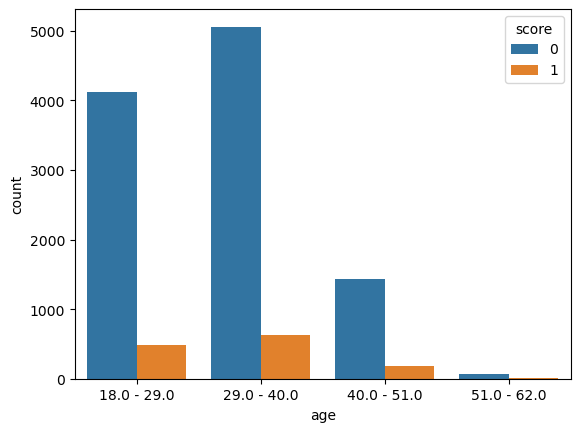

In [6]:
sns.countplot(x="age", hue="score", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'La Araucanía'),
  Text(1, 0, 'Maule'),
  Text(2, 0, 'Coquimbo'),
  Text(3, 0, "Libertador Bernardo O'Higgins"),
  Text(4, 0, 'Metropolitana'),
  Text(5, 0, 'Los Lagos'),
  Text(6, 0, 'Valparaíso'),
  Text(7, 0, 'Bio Bío'),
  Text(8, 0, 'Atacama'),
  Text(9, 0, 'Tarapacá'),
  Text(10, 0, 'Arica y Parinacota'),
  Text(11, 0, 'Aysén'),
  Text(12, 0, 'Los Ríos'),
  Text(13, 0, 'Magallanes y Antártica Chilena'),
  Text(14, 0, 'Antofagasta'),
  Text(15, 0, 'Ñuble')])

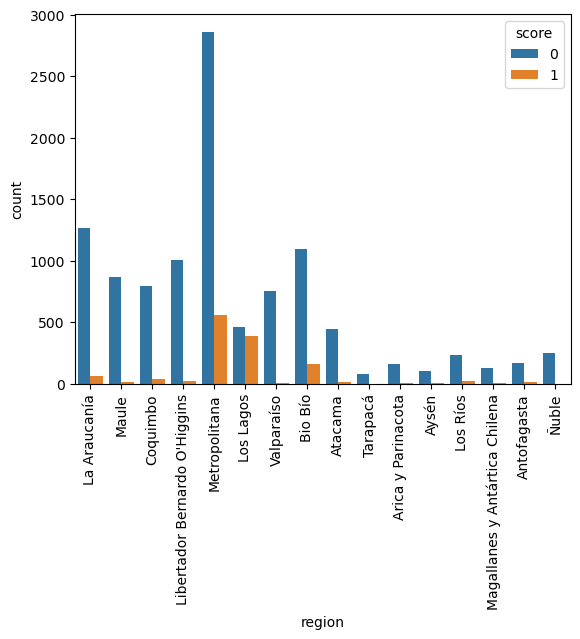

In [7]:
sns.countplot(x="region", hue="score", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='zone', ylabel='count'>

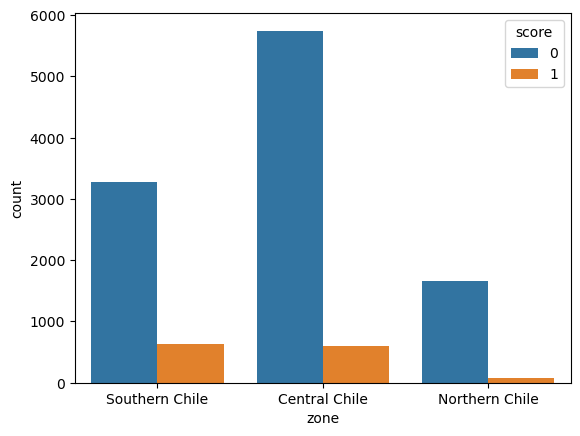

In [8]:
sns.countplot(x="zone", hue="score", data=df)

### Visualización resultados actuales

<AxesSubplot:xlabel='age', ylabel='count'>

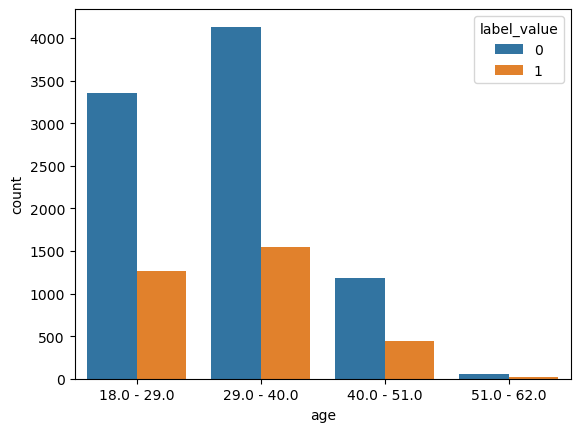

In [9]:
sns.countplot(x="age", hue="label_value", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'La Araucanía'),
  Text(1, 0, 'Maule'),
  Text(2, 0, 'Coquimbo'),
  Text(3, 0, "Libertador Bernardo O'Higgins"),
  Text(4, 0, 'Metropolitana'),
  Text(5, 0, 'Los Lagos'),
  Text(6, 0, 'Valparaíso'),
  Text(7, 0, 'Bio Bío'),
  Text(8, 0, 'Atacama'),
  Text(9, 0, 'Tarapacá'),
  Text(10, 0, 'Arica y Parinacota'),
  Text(11, 0, 'Aysén'),
  Text(12, 0, 'Los Ríos'),
  Text(13, 0, 'Magallanes y Antártica Chilena'),
  Text(14, 0, 'Antofagasta'),
  Text(15, 0, 'Ñuble')])

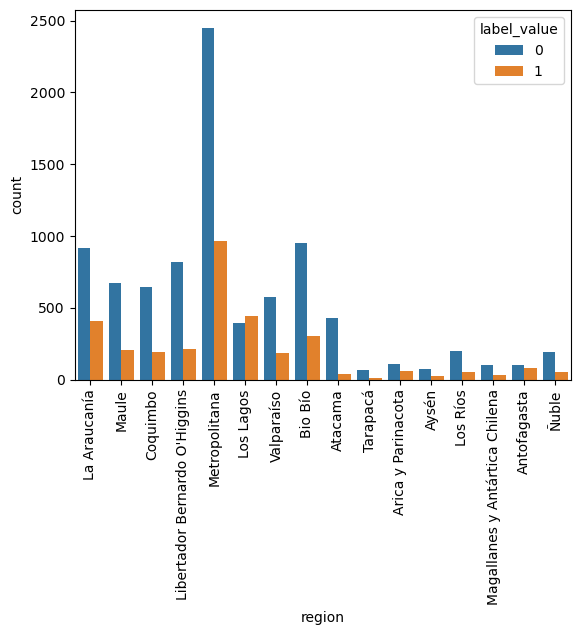

In [10]:
sns.countplot(x="region", hue="label_value", data=df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='zone', ylabel='count'>

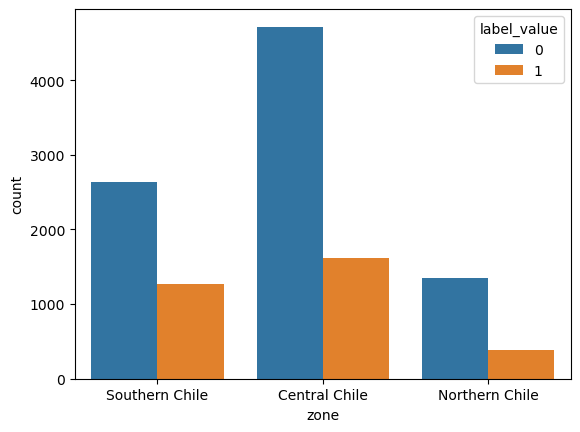

In [11]:
sns.countplot(x="zone", hue="label_value", data=df)

## Probando Aequitas

### Métricas de sesgo entre grupos

In [12]:
df.drop(['barrister', 'effective_hearings'], axis=1, inplace = True)
df

,region,crime_stage,score,label_value,age,zone
0,La Araucanía,Consumado,0,0,18.0 - 29.0,Southern Chile
1,Maule,Consumado,0,0,18.0 - 29.0,Central Chile
2,Coquimbo,Consumado,0,0,18.0 - 29.0,Northern Chile
3,Libertador Bernardo O'Higgins,Consumado,0,1,29.0 - 40.0,Central Chile
4,Metropolitana,Frustrado,0,0,29.0 - 40.0,Central Chile
...,...,...,...,...,...,...
11982,Metropolitana,Frustrado,0,0,40.0 - 51.0,Central Chile
11983,Magallanes y Antártica Chilena,Frustrado,0,0,40.0 - 51.0,Southern Chile
11984,Metropolitana,Consumado,1,1,18.0 - 29.0,Central Chile
11985,Metropolitana,Frustrado,0,0,18.0 - 29.0,Central Chile


In [13]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [14]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [15]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,1307,region,Antofagasta,15,169,5,71,98,10,81,103,184,11987
1,0,binary 0/1,1307,region,Arica y Parinacota,6,162,1,57,105,5,62,106,168,11987
2,0,binary 0/1,1307,region,Atacama,17,448,8,28,420,9,37,428,465,11987
3,0,binary 0/1,1307,region,Aysén,3,100,3,27,73,0,27,76,103,11987
4,0,binary 0/1,1307,region,Bio Bío,156,1096,46,192,904,110,302,950,1252,11987
5,0,binary 0/1,1307,region,Coquimbo,41,798,24,174,624,17,191,648,839,11987
6,0,binary 0/1,1307,region,La Araucanía,62,1262,12,356,906,50,406,918,1324,11987
7,0,binary 0/1,1307,region,Libertador Bernardo O'Higgins,25,1009,7,196,813,18,214,820,1034,11987
8,0,binary 0/1,1307,region,Los Lagos,385,457,166,226,231,219,445,397,842,11987
9,0,binary 0/1,1307,region,Los Ríos,19,233,5,39,194,14,53,199,252,11987


In [16]:
# Filtrar las columnas relevantes
relevant_cols = ['attribute_name', 'attribute_value', 'pp', 'pn', 'fp', 'fn', 'tn', 'tp']
filtered_xtab = xtab[relevant_cols]

# Agrupar por 'attribute_name' y sumar los falsos negativos
fn_by_feature = filtered_xtab.groupby('attribute_name')['fn'].sum().reset_index()
filtered_xtab[filtered_xtab['attribute_name']=='region']

# Calculando métricas
filtered_xtab['tpr'] = filtered_xtab['tp'] / (filtered_xtab['tp'] + filtered_xtab['fn'])
filtered_xtab['fnr'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tp'])
filtered_xtab['for'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tn'])
filtered_xtab['fdr'] = filtered_xtab['fp'] / (filtered_xtab['fp'] + filtered_xtab['tp'])

# Para evitar el warning de pandas sobre la asignación de valores a un slice de un df
pd.set_option('mode.chained_assignment', None)

# Filtramos solo las filas para 'Region'
region_metrics = filtered_xtab[filtered_xtab['attribute_name'] == 'region']

# Mostrar el resultado

region_metrics.to_csv("outputs/region_metrics_hfalta.csv", index=False)

/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_83468/667345557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_xtab['tpr'] = filtered_xtab['tp'] / (filtered_xtab['tp'] + filtered_xtab['fn'])
/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_83468/667345557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_xtab['fnr'] = filtered_xtab['fn'] / (filtered_xtab['fn'] + filtered_xtab['tp'])
/var/folders/dv/yyl2yv_j3hl4xyrt3r2qmh4h0000gn/T/ipykernel_83468/667345557.py:

In [17]:
print(region_metrics['tpr'].mean())
print(region_metrics['fnr'].mean())
print(region_metrics['for'].mean())
print(region_metrics['fdr'].mean())

0.14873733691645913
0.8512626630835409
0.2464247875926672
0.44641115376444257


In [18]:
# Filtramos las filas relevantes
region_rows = xtab[xtab['attribute_name'] == 'region']

# Calculamos las métricas
total_fp = region_rows['fp'].sum()
total_fn = region_rows['fn'].sum()
total_tp = region_rows['tp'].sum()
total_tn = region_rows['tn'].sum()

fpr = total_fp / (total_fp + total_tn)
fnr = total_fn / (total_fn + total_tp)
for_rate = total_fn / (total_fn + total_tn)
fdr = total_fp / (total_fp + total_tp)

print(f"False Positive Rate (FPR) for region: {fpr:.4f}")
print(f"False Negative Rate (FNR) for region: {fnr:.4f}")
print(f"False Omission Rate (FOR) for region: {for_rate:.4f}")
print(f"False Discovery Rate (FDR) for region: {fdr:.4f}")

False Positive Rate (FPR) for region: 0.0496
False Negative Rate (FNR) for region: 0.7329
False Omission Rate (FOR) for region: 0.2248
False Discovery Rate (FDR) for region: 0.3305


### Glosario del crosstab:

- k = Cantidad de predicciones positivas (suma de 1s).
- pp = Cantidad de ítems del grupo que fueron predecidos como Positivo.
- pn = Cantidad de ítems del grupo que fueron predecidos como Negativo.
- fp = Cantidad de ítems del grupo que son falsos positivos.
- fn = Cantidad de ítems del grupo que son falsos negativos.
- tn = Cantidad de ítems del grupo que son realmente negativos.
- tp = Cantidad de ítems del grupo que son realmente positivos.

In [19]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,region,Antofagasta,0.12,0.95,0.42,0.33,0.05,0.88,0.58,0.67,0.01,0.08,0.44
1,region,Arica y Parinacota,0.08,0.99,0.35,0.17,0.01,0.92,0.65,0.83,0.00,0.04,0.37
2,region,Atacama,0.24,0.98,0.06,0.47,0.02,0.76,0.94,0.53,0.01,0.04,0.08
3,region,Aysén,0.00,0.96,0.27,1.00,0.04,1.00,0.73,0.00,0.00,0.03,0.26
4,region,Bio Bío,0.36,0.95,0.18,0.29,0.05,0.64,0.82,0.71,0.12,0.12,0.24
5,region,Coquimbo,0.09,0.96,0.22,0.59,0.04,0.91,0.78,0.41,0.03,0.05,0.23
6,region,La Araucanía,0.12,0.99,0.28,0.19,0.01,0.88,0.72,0.81,0.05,0.05,0.31
7,region,Libertador Bernardo O'Higgins,0.08,0.99,0.19,0.28,0.01,0.92,0.81,0.72,0.02,0.02,0.21
8,region,Los Lagos,0.49,0.58,0.49,0.43,0.42,0.51,0.51,0.57,0.29,0.46,0.53
9,region,Los Ríos,0.26,0.97,0.17,0.26,0.03,0.74,0.83,0.74,0.01,0.08,0.21


In [20]:
print('FPR: ',  xtab["fpr"].mean())
print('FNR: ',  xtab["fnr"].mean())
print('FDR: ',  xtab["fdr"].mean())
print('FOR: ',  xtab["for"].mean())

FPR:  0.07871421947464732
FNR:  0.7905763605639239
FDR:  0.42370094473028996
FOR:  0.23948311145497272


### Glosario de métricas absolutas:

- tpr = Proporción de verdaderos positivos.
- tnr = Proporción de verdaderos negativos.
- for = Proporción de falsos negativos sobre el total de negativos predecidos.
- fdr = Proporción de falsos positivos sobre el total de positivos predecidos.
- fpr = Proporción de falsos positivos sobre el total de negativos reales.
- fnr = Proporción de falsos negativos sobre el total de positivos reales.
- npv = Negative Predictive Value (?)
- ppr = Fracción de esta entidad que fue predecida positiva sobre el total de registros.
- pprev = Fracción de esta entidad del grupo que fue predecida como positva.
- prev = Fracción de esta entidad del grupo que es realemente positiva.

### Niveles de disparidad

In [21]:
b = Bias()
df.head()

,region,crime_stage,score,label_value,age,zone
0,La Araucanía,Consumado,0.0,0,18.0 - 29.0,Southern Chile
1,Maule,Consumado,0.0,0,18.0 - 29.0,Central Chile
2,Coquimbo,Consumado,0.0,0,18.0 - 29.0,Northern Chile
3,Libertador Bernardo O'Higgins,Consumado,0.0,1,29.0 - 40.0,Central Chile
4,Metropolitana,Frustrado,0.0,0,29.0 - 40.0,Central Chile


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11987 entries, 0 to 11986
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       11987 non-null  object 
 1   crime_stage  11987 non-null  object 
 2   score        11987 non-null  float64
 3   label_value  11987 non-null  int64  
 4   age          11987 non-null  object 
 5   zone         11987 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


### Acá tomamos como referencia a los grupos mayoritarios de cada feature. 

In [23]:
grupo_mayoritario = b.get_disparity_major_group(xtab, original_df=df)

get_disparity_major_group()


### Acá tomamos como referencia a los valores mínimos de las métricas de cada grupo.

In [24]:
min_valores = b.get_disparity_min_metric(df=xtab, original_df=df)

get_disparity_min_metric()


### Acá usamos un grupo base (de referencia) predefinido. Sería interesante comparar con respecto a los usuarios de la RM, de edad entre 18 y 34 años, no extranjeros, que pertenecen a la zona central del país.

In [26]:
grupo_definido = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'region':'Metropolitana', 'crime_stage':'Consumado','age':'29.0 - 40.0','zone':'Central Chile'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)

get_disparity_predefined_group()


/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/aequitas/bias.py:606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, difference_significance_p = stats.ttest_ind(
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/nsalazarv/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in 

Seguiremos la investigación con este grupo.

In [27]:
grupo_definido[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_definido)]

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity
0,region,Antofagasta,1.260771,1.517878,2.152449,0.809722,0.720512,0.026978,0.501447,0.906275,1.012135,0.292191
1,region,Arica y Parinacota,0.630385,1.592013,1.802690,0.157361,0.805335,0.010791,0.219681,1.132844,1.053739,0.190867
2,region,Atacama,1.779912,1.310448,0.320215,0.311781,1.164859,0.030576,0.224878,0.719689,1.043891,0.575695
3,region,Aysén,3.782313,1.731664,1.383327,0.658432,0.907037,0.005396,0.179158,0.000000,1.021783,0.000000
4,region,Bio Bío,1.115297,1.100925,0.897536,0.807676,1.024849,0.280576,0.766428,0.958561,1.012265,0.862061
5,region,Coquimbo,2.214037,1.577537,1.117140,0.617788,0.971592,0.073741,0.300589,0.563659,1.024375,0.210653
6,region,La Araucanía,0.732061,1.518405,1.445280,0.218043,0.892012,0.111511,0.288041,1.096301,1.049869,0.291471
7,region,Libertador Bernardo O'Higgins,1.059048,1.586010,0.995236,0.142393,1.001155,0.044964,0.148720,0.978778,1.054693,0.199072
8,region,Los Lagos,1.630815,0.879452,2.533690,6.974623,0.628055,0.692446,2.812548,0.773277,0.618972,1.164759
9,region,Los Ríos,0.995346,1.274243,0.857571,0.419102,1.034541,0.034173,0.463772,1.001673,1.037046,0.625179


Aquí, la disparidad corresponde a la proporción de la métrica del atributo. Se hace con métrica del atributo/métrica atributo grupo control. 

In [28]:
metrics = ['fnr','for','tpr']
disparity_tolerance = 1.5 ### Este es nuestro Tau

In [29]:
grupo_definido = grupo_definido.replace(0,0.0002)

In [30]:
ap.summary(grupo_definido, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [31]:
ap.disparity(grupo_definido, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [32]:
ap.absolute(grupo_definido, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [33]:
ap.disparity(grupo_definido, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [34]:
ap.absolute(grupo_definido, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [35]:
ap.disparity(grupo_definido, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [36]:
ap.absolute(grupo_definido, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [37]:
ap.disparity(grupo_definido, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [38]:
ap.absolute(grupo_definido, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Ahora probando con el grupo mayoritario.

In [39]:
grupo_mayoritario[['attribute_name', 'attribute_value'] +  b.list_disparities(grupo_mayoritario)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,0.026978,0.501447,0.906275,1.260771,2.152449,0.809722,1.517878,0.292191,1.012135,0.720512
1,region,Arica y Parinacota,0.010791,0.219681,1.132844,0.630385,1.802690,0.157361,1.592013,0.190867,1.053739,0.805335
2,region,Atacama,0.030576,0.224878,0.719689,1.779912,0.320215,0.311781,1.310448,0.575695,1.043891,1.164859
3,region,Aysén,0.005396,0.179158,0.000000,3.782313,1.383327,0.658432,1.731664,0.000000,1.021783,0.907037
4,region,Bio Bío,0.280576,0.766428,0.958561,1.115297,0.897536,0.807676,1.100925,0.862061,1.012265,1.024849
5,region,Coquimbo,0.073741,0.300589,0.563659,2.214037,1.117140,0.617788,1.577537,0.210653,1.024375,0.971592
6,region,La Araucanía,0.111511,0.288041,1.096301,0.732061,1.445280,0.218043,1.518405,0.291471,1.049869,0.892012
7,region,Libertador Bernardo O'Higgins,0.044964,0.148720,0.978778,1.059048,0.995236,0.142393,1.586010,0.199072,1.054693,1.001155
8,region,Los Lagos,0.692446,2.812548,0.773277,1.630815,2.533690,6.974623,0.879452,1.164759,0.618972,0.628055
9,region,Los Ríos,0.034173,0.463772,1.001673,0.995346,0.857571,0.419102,1.274243,0.625179,1.037046,1.034541


In [40]:
grupo_mayoritario = grupo_mayoritario.replace(0,0.0002)

In [41]:
ap.summary(grupo_mayoritario, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [42]:
ap.disparity(grupo_mayoritario, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [43]:
ap.absolute(grupo_mayoritario, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [44]:
ap.disparity(grupo_mayoritario, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [45]:
ap.absolute(grupo_mayoritario, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [46]:
ap.disparity(grupo_mayoritario, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [47]:
ap.absolute(grupo_mayoritario, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [48]:
ap.disparity(grupo_mayoritario, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [49]:
ap.absolute(grupo_mayoritario, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Ahora probando con el grupo minoritario

In [50]:
min_valores[['attribute_name', 'attribute_value'] +  b.list_disparities(min_valores)]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,region,Antofagasta,10.000000,10.000000,10.000000,2.500000,6.721893,10.000000,1.725937,10.000000,1.635187,1.147212
1,region,Arica y Parinacota,10.000000,10.000000,10.000000,1.250000,5.629630,10.000000,1.810234,10.000000,1.702401,1.282267
2,region,Atacama,10.000000,10.000000,10.000000,3.529412,1.000000,10.000000,1.490074,10.000000,1.686491,1.854708
3,region,Aysén,10.000000,10.000000,NaN,7.500000,4.320000,10.000000,1.969027,NaN,1.650775,1.444199
4,region,Bio Bío,10.000000,10.000000,10.000000,2.211538,2.802920,10.000000,1.251831,10.000000,1.635398,1.631782
5,region,Coquimbo,10.000000,10.000000,10.000000,4.390244,3.488722,10.000000,1.793773,10.000000,1.654962,1.546984
6,region,La Araucanía,10.000000,10.000000,10.000000,1.451613,4.513471,10.000000,1.726536,10.000000,1.696149,1.420277
7,region,Libertador Bernardo O'Higgins,10.000000,10.000000,10.000000,2.100000,3.108028,10.000000,1.803407,10.000000,1.703944,1.594056
8,region,Los Lagos,10.000000,10.000000,10.000000,3.233766,7.912473,10.000000,1.000000,10.000000,1.000000,1.000000
9,region,Los Ríos,10.000000,10.000000,10.000000,1.973684,2.678112,10.000000,1.448906,10.000000,1.675433,1.647214


In [51]:
min_valores = min_valores.replace(0,0.0002)

In [52]:
ap.summary(min_valores, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [53]:
ap.disparity(min_valores, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [54]:
ap.absolute(min_valores, metrics, 'region', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [55]:
ap.disparity(min_valores, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [56]:
ap.absolute(min_valores, metrics, 'zone', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [57]:
ap.disparity(min_valores, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [58]:
ap.absolute(min_valores, metrics, 'age', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [59]:
ap.disparity(min_valores, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [60]:
ap.absolute(min_valores, metrics, 'crime_stage', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Niveles de paridad

In [61]:
f = Fairness()
fdf = f.get_group_value_fairness(grupo_definido)

In [62]:
parity_detrminations = f.list_parities(fdf)

In [63]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,Precision Parity,FDR Parity,FOR Parity,FPR Parity,Supervised Fairness,Impact Parity,TPR Parity,TNR Parity,NPV Parity,Statistical Parity,TypeII Parity,TypeI Parity,Unsupervised Fairness,Equalized Odds,FNR Parity
0,region,Antofagasta,0.123457,0.951456,0.420118,0.333333,0.048544,0.876543,0.579882,0.666667,0.011477,0.081522,0.440217,1.260771,1.517878,2.152449,0.809722,0.720512,0.026978,0.501447,0.906275,1.012135,0.292191,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,region,Arica y Parinacota,0.080645,0.990566,0.351852,0.166667,0.009434,0.919355,0.648148,0.833333,0.004591,0.035714,0.369048,0.630385,1.592013,1.802690,0.157361,0.805335,0.010791,0.219681,1.132844,1.053739,0.190867,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,region,Atacama,0.243243,0.981308,0.062500,0.470588,0.018692,0.756757,0.937500,0.529412,0.013007,0.036559,0.079570,1.779912,1.310448,0.320215,0.311781,1.164859,0.030576,0.224878,0.719689,1.043891,0.575695,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,region,Aysén,0.000200,0.960526,0.270000,1.000000,0.039474,1.000000,0.730000,0.000200,0.002295,0.029126,0.262136,3.782313,1.731664,1.383327,0.658432,0.907037,0.005396,0.179158,0.000200,1.021783,0.000200,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,region,Bio Bío,0.364238,0.951579,0.175182,0.294872,0.048421,0.635762,0.824818,0.705128,0.119357,0.124601,0.241214,1.115297,1.100925,0.897536,0.807676,1.024849,0.280576,0.766428,0.958561,1.012265,0.862061,True,True,True,True,True,False,True,True,True,False,True,True,False,True,True
5,region,Coquimbo,0.089005,0.962963,0.218045,0.585366,0.037037,0.910995,0.781955,0.414634,0.031370,0.048868,0.227652,2.214037,1.577537,1.117140,0.617788,0.971592,0.073741,0.300589,0.563659,1.024375,0.210653,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False
6,region,La Araucanía,0.123153,0.986928,0.282092,0.193548,0.013072,0.876847,0.717908,0.806452,0.047437,0.046828,0.306647,0.732061,1.518405,1.445280,0.218043,0.892012,0.111511,0.288041,1.096301,1.049869,0.291471,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False
7,region,Libertador Bernardo O'Higgins,0.084112,0.991463,0.194252,0.280000,0.008537,0.915888,0.805748,0.720000,0.019128,0.024178,0.206963,1.059048,1.586010,0.995236,0.142393,1.001155,0.044964,0.148720,0.978778,1.054693,0.199072,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
8,region,Los Lagos,0.492135,0.581864,0.494530,0.431169,0.418136,0.507865,0.505470,0.568831,0.294568,0.457245,0.528504,1.630815,0.879452,2.533690,6.974623,0.628055,0.692446,2.812548,0.773277,0.618972,1.164759,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
9,region,Los Ríos,0.264151,0.974874,0.167382,0.263158,0.025126,0.735849,0.832618,0.736842,0.014537,0.075397,0.210317,0.995346,1.274243,0.857571,0.419102,1.034541,0.034173,0.463772,1.001673,1.037046,0.625179,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False


In [64]:
gaf = f.get_group_attribute_fairness(fdf)
gaf[['attribute_name', 'Statistical Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Unsupervised Fairness', 'Supervised Fairness']]

,attribute_name,Statistical Parity,FNR Parity,FOR Parity,TPR Parity,Unsupervised Fairness,Supervised Fairness
0,age,False,True,True,False,False,False
1,crime_stage,False,False,False,False,False,False
2,region,False,False,False,False,False,False
3,zone,False,True,False,False,False,False


In [65]:
equidad = f.get_overall_fairness(gaf)
equidad

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}